   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

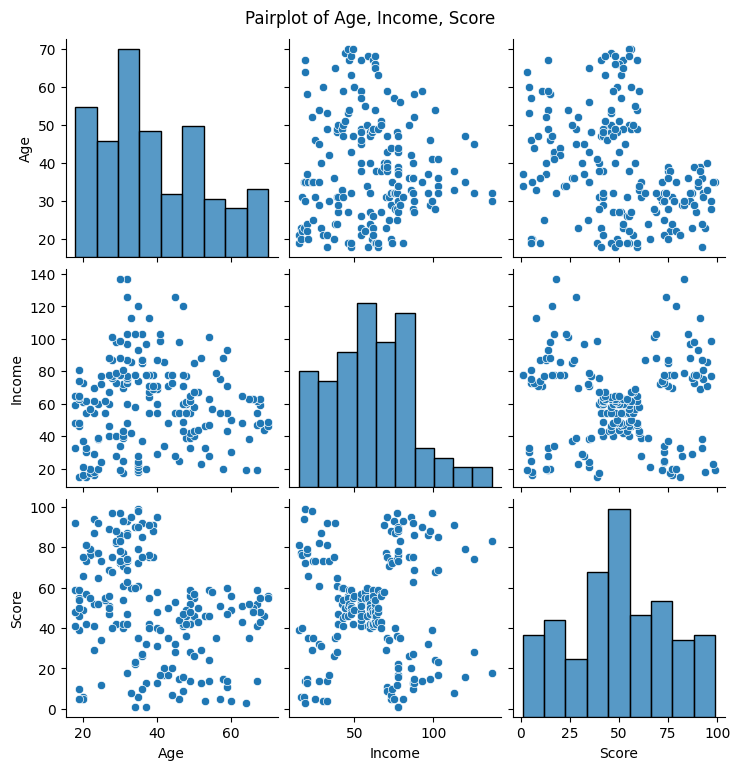

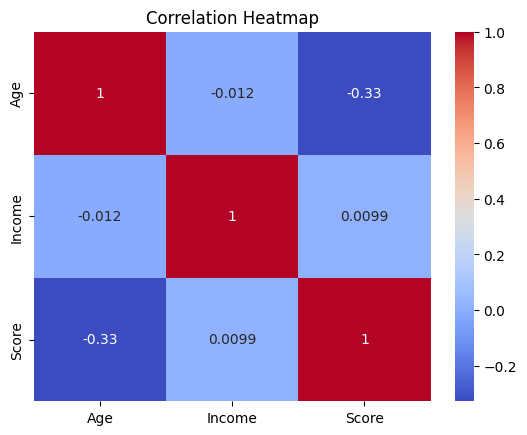

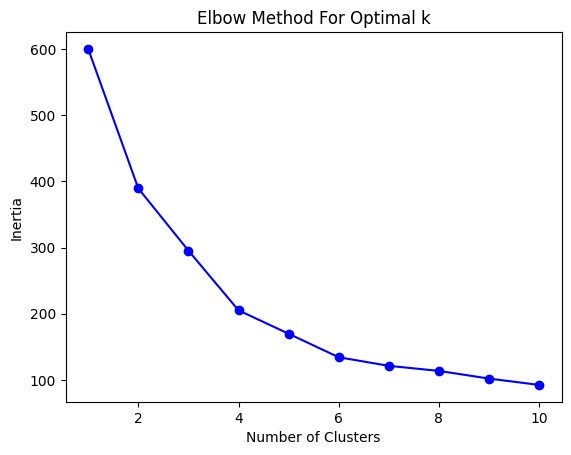

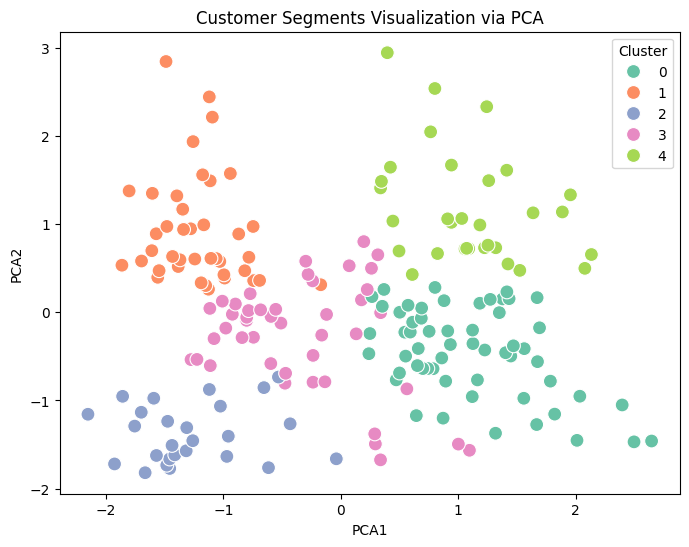


Cluster Summary:
               Age     Income      Score
Cluster                                 
0        55.275862  47.620690  41.706897
1        32.875000  86.100000  81.525000
2        25.769231  26.115385  74.846154
3        26.733333  54.311111  40.911111
4        44.387097  89.774194  18.483871

Marketing Strategy Suggestions:

Cluster 0:
- Moderate segment. Strategy: General engagement campaigns.

Cluster 1:
- High income & high spenders. Strategy: Premium offers, loyalty programs.

Cluster 2:
- Low income but high spenders. Strategy: Discounts, budget-friendly packages.

Cluster 3:
- Moderate segment. Strategy: General engagement campaigns.

Cluster 4:
- High income but low spenders. Strategy: Targeted promotions, brand awareness.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv('Mall_Customers.csv')

# EDA
print(df.head())
print(df.info())
print(df.describe())

# Rename columns for ease
df.rename(columns={"Annual Income (k$)": "Income", "Spending Score (1-100)": "Score"}, inplace=True)

# Visualizations
sns.pairplot(df[['Age', 'Income', 'Score']])
plt.suptitle('Pairplot of Age, Income, Score', y=1.02)
plt.show()

sns.heatmap(df[['Age', 'Income', 'Score']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Feature Selection
X = df[['Age', 'Income', 'Score']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method to find optimal k
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# K-Means with optimal k=5 (assumption based on elbow)
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Dimensionality Reduction with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Cluster Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='Set2', s=100)
plt.title('Customer Segments Visualization via PCA')
plt.show()

# Cluster Summary
cluster_summary = df.groupby('Cluster')[['Age', 'Income', 'Score']].mean()
print("\nCluster Summary:")
print(cluster_summary)

# Strategy Suggestions
print("\nMarketing Strategy Suggestions:")
for cluster, row in cluster_summary.iterrows():
    age, income, score = row
    print(f"\nCluster {cluster}:")
    if income > 70 and score > 60:
        print("- High income & high spenders. Strategy: Premium offers, loyalty programs.")
    elif income > 70 and score <= 40:
        print("- High income but low spenders. Strategy: Targeted promotions, brand awareness.")
    elif income < 40 and score > 60:
        print("- Low income but high spenders. Strategy: Discounts, budget-friendly packages.")
    elif age < 30 and score > 60:
        print("- Young and active spenders. Strategy: Digital marketing, trend-based campaigns.")
    else:
        print("- Moderate segment. Strategy: General engagement campaigns.")
